## Select_and_delete
Use a lat/lon bounding box and image locations in the navigation files to make a list of files outside the bounding box and delete them.

This is the version used on the EC2 instance for the November flights, revised to select a portion of the Pea Island images.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# bounding coords for Pea Island near the experiment site
latmin = 35.692
latmax = 35.655
lonmin = -75.54
lonmax = -75.44

parent_dir = 'D:\\data\\HxDorian_2019\\2019_all_flights_locations'
# locations for August flights
nav_files = ['2019_0830_ppk-photo-locations-mbase-GP192757.txt',\
             '2019_0830_ppk-photo-locations-mbase-GP161658.txt']
skiprows = [35, 35]

# Locations for Sep. flights
# nav_files = ['2019_0912_ppk-photo-locations-mbase-GP151012.txt',\
#              '2019_0912_ppk-photo-locations-5base-GP205057.txt']
# skiprows = [35, 38]

path=[]
for i in range(len(nav_files)):
   path.append( os.path.join(parent_dir,nav_files[i]) )

# Kludge alert: Run this twice with n=0 and n=1
n=0
df = pd.read_csv(path[n], skiprows=skiprows[n], header=None, delim_whitespace=True,\
                names = ['image_name','easting','northing','elev','lat','lon','ell','one',\
                         'SDHeight','SDHoriz','UTCDate','UTCTime','UTCSeconds'])
df.describe()
df

,image_name,easting,northing,elev,lat,lon,ell,one,SDHeight,SDHoriz,UTCDate,UTCTime,UTCSeconds
0,2019-0830-193820-DSC04000-N7251F.jpg,444878.626,3976511.973,312.337,35.931398,-75.611060,273.359,1,0.034,0.020,8/30/2019,19:38:02.019,502682.019
1,2019-0830-193821-DSC04001-N7251F.jpg,444913.665,3976472.668,312.417,35.931045,-75.610669,273.439,1,0.034,0.020,8/30/2019,19:38:03.020,502683.020
2,2019-0830-193822-DSC04002-N7251F.jpg,444947.560,3976432.252,312.368,35.930683,-75.610290,273.390,1,0.034,0.020,8/30/2019,19:38:04.023,502684.023
3,2019-0830-193823-DSC04003-N7251F.jpg,444980.050,3976390.811,311.990,35.930311,-75.609927,273.012,1,0.031,0.018,8/30/2019,19:38:05.024,502685.024
4,2019-0830-193824-DSC04004-N7251F.jpg,445011.191,3976348.256,311.347,35.929929,-75.609579,272.368,1,0.027,0.016,8/30/2019,19:38:06.025,502686.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10371,2019-0830-224617-DSC09071-N7251F.jpg,446143.905,3974132.253,307.102,35.910014,-75.596873,268.125,1,0.026,0.013,8/30/2019,22:45:59.014,513959.014
10372,2019-0830-224618-DSC09072-N7251F.jpg,446165.499,3974086.945,307.619,35.909606,-75.596631,268.642,1,0.026,0.013,8/30/2019,22:46:00.015,513960.015
10373,2019-0830-224619-DSC09073-N7251F.jpg,446186.597,3974041.433,307.925,35.909197,-75.596394,268.948,1,0.026,0.013,8/30/2019,22:46:01.016,513961.016
10374,2019-0830-224620-DSC09074-N7251F.jpg,446206.773,3973995.513,308.528,35.908784,-75.596167,269.551,1,0.026,0.013,8/30/2019,22:46:02.018,513962.018


In [2]:
# Find images outside the bounding box and put them in a new, smaller dataframe called `dfs`

dfs = df[ (df['lat']<latmin) | (df['lat']>latmax) & (df['lon']<lonmin) | (df['lon']>lonmax) ]
print("Found {} images.".format(len(dfs)))
dfs

Found 9912 images.


,image_name,easting,northing,elev,lat,lon,ell,one,SDHeight,SDHoriz,UTCDate,UTCTime,UTCSeconds
0,2019-0830-193820-DSC04000-N7251F.jpg,444878.626,3976511.973,312.337,35.931398,-75.611060,273.359,1,0.034,0.020,8/30/2019,19:38:02.019,502682.019
1,2019-0830-193821-DSC04001-N7251F.jpg,444913.665,3976472.668,312.417,35.931045,-75.610669,273.439,1,0.034,0.020,8/30/2019,19:38:03.020,502683.020
2,2019-0830-193822-DSC04002-N7251F.jpg,444947.560,3976432.252,312.368,35.930683,-75.610290,273.390,1,0.034,0.020,8/30/2019,19:38:04.023,502684.023
3,2019-0830-193823-DSC04003-N7251F.jpg,444980.050,3976390.811,311.990,35.930311,-75.609927,273.012,1,0.031,0.018,8/30/2019,19:38:05.024,502685.024
4,2019-0830-193824-DSC04004-N7251F.jpg,445011.191,3976348.256,311.347,35.929929,-75.609579,272.368,1,0.027,0.016,8/30/2019,19:38:06.025,502686.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10371,2019-0830-224617-DSC09071-N7251F.jpg,446143.905,3974132.253,307.102,35.910014,-75.596873,268.125,1,0.026,0.013,8/30/2019,22:45:59.014,513959.014
10372,2019-0830-224618-DSC09072-N7251F.jpg,446165.499,3974086.945,307.619,35.909606,-75.596631,268.642,1,0.026,0.013,8/30/2019,22:46:00.015,513960.015
10373,2019-0830-224619-DSC09073-N7251F.jpg,446186.597,3974041.433,307.925,35.909197,-75.596394,268.948,1,0.026,0.013,8/30/2019,22:46:01.016,513961.016
10374,2019-0830-224620-DSC09074-N7251F.jpg,446206.773,3973995.513,308.528,35.908784,-75.596167,269.551,1,0.026,0.013,8/30/2019,22:46:02.018,513962.018


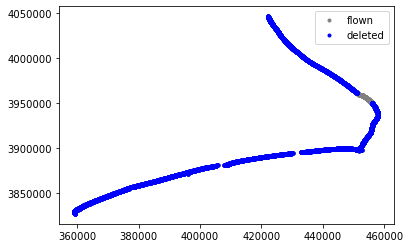

In [3]:
# Make a simple plot

easting = df['easting'].values
northing = df['northing'].values
eastings = dfs['easting'].values
northings = dfs['northing'].values
plt.plot(easting,northing,'.',color='gray',label='flown')
plt.plot(eastings,northings,'.',color='blue',label='deleted')
plt.legend()
plt.show()

In [4]:
# Delete the files

location = "D:\\data\\HxDorian_2019\\2019-08-30_Pea_Island_jpg_New_Inlet"
for f in dfs['image_name'].values :

    # Path 
    path = os.path.join(location, f) 

    # Remove the file 
    # 'file.txt'
    try:
        os.remove(path) 
        print("Removed:",f) 
    except:
        #print("Fail: ",path)
        pass

Removed: 2019-0830-194816-DSC04596-N7251F.jpg
Removed: 2019-0830-194817-DSC04597-N7251F.jpg
Removed: 2019-0830-194818-DSC04598-N7251F.jpg
Removed: 2019-0830-194819-DSC04599-N7251F.jpg
Removed: 2019-0830-194820-DSC04600-N7251F.jpg
Removed: 2019-0830-194821-DSC04601-N7251F.jpg
Removed: 2019-0830-194822-DSC04602-N7251F.jpg
Removed: 2019-0830-194823-DSC04603-N7251F.jpg
Removed: 2019-0830-194824-DSC04604-N7251F.jpg
Removed: 2019-0830-194825-DSC04605-N7251F.jpg
Removed: 2019-0830-194826-DSC04606-N7251F.jpg
Removed: 2019-0830-194827-DSC04607-N7251F.jpg
Removed: 2019-0830-194828-DSC04608-N7251F.jpg
Removed: 2019-0830-194829-DSC04609-N7251F.jpg
Removed: 2019-0830-194830-DSC04610-N7251F.jpg
Removed: 2019-0830-194831-DSC04611-N7251F.jpg
Removed: 2019-0830-194832-DSC04612-N7251F.jpg
Removed: 2019-0830-194833-DSC04613-N7251F.jpg
Removed: 2019-0830-194834-DSC04614-N7251F.jpg
Removed: 2019-0830-194835-DSC04615-N7251F.jpg
Removed: 2019-0830-194836-DSC04616-N7251F.jpg
Removed: 2019-0830-194837-DSC04617

Removed: 2019-0830-195127-DSC04787-N7251F.jpg
Removed: 2019-0830-195128-DSC04788-N7251F.jpg
Removed: 2019-0830-195130-DSC04790-N7251F.jpg
Removed: 2019-0830-195131-DSC04791-N7251F.jpg
Removed: 2019-0830-195132-DSC04792-N7251F.jpg
Removed: 2019-0830-195133-DSC04793-N7251F.jpg
Removed: 2019-0830-195134-DSC04794-N7251F.jpg
Removed: 2019-0830-195135-DSC04795-N7251F.jpg
Removed: 2019-0830-195136-DSC04796-N7251F.jpg
Removed: 2019-0830-214538-DSC00967-N7251F.jpg
Removed: 2019-0830-214539-DSC00968-N7251F.jpg
Removed: 2019-0830-214540-DSC00969-N7251F.jpg
Removed: 2019-0830-214541-DSC00970-N7251F.jpg
Removed: 2019-0830-214542-DSC00971-N7251F.jpg
Removed: 2019-0830-214543-DSC00972-N7251F.jpg
Removed: 2019-0830-214544-DSC00973-N7251F.jpg
Removed: 2019-0830-214545-DSC00974-N7251F.jpg
Removed: 2019-0830-214546-DSC00975-N7251F.jpg
Removed: 2019-0830-214547-DSC00976-N7251F.jpg
Removed: 2019-0830-214548-DSC00977-N7251F.jpg
Removed: 2019-0830-214549-DSC00978-N7251F.jpg
Removed: 2019-0830-214550-DSC00979

Removed: 2019-0830-224621-DSC09075-N7251F.jpg
